# PROJET IA for HumanForYou - Entraînement et Évaluation du Modèle

|Auteur|
|---|
|G. DUBOYS DE LAVIGERIE|
|T. VILLETTE|
|O. BOUSSARD|
|A. BRICON|

## Objectifs du Notebook

Ce notebook a pour objectif de développer plusieurs modèles d'IA en utilisant les données prétraitées et de les évaluer sur un ensemble de test. Les étapes comprennent :

1. **Division des données :** Séparation des données en ensembles d'entraînement et de test.
2. **Entraînement des modèles :** Développement de plusieurs modèles d'IA avec les données d'entraînement.
3. **Évaluation des modèles :** Mesure des performances de chaque modèle sur l'ensemble de test.
4. **Sélection du meilleur modèle :** Analyse des résultats pour choisir le modèle offrant les performances les plus prometteuses.

## Attendus

À la fin de ce notebook, le modèle sera prêt à être déployé, accompagné d'une évaluation détaillée de ses performances.

## Prérequis

Avant d'exécuter ce notebook, assurez-vous d'avoir exécuté le notebook `data_preprocessing.ipynb` pour garantir que les données sont prêtes pour l'entraînement du modèle.

## Préparation de l'environnement

In [4]:
# Compatibilité entre Python 2 et Python 3
from __future__ import division, print_function, unicode_literals

# Imports nécessaires
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import seaborn as sns

# Assurer la stabilité du notebook entre différentes exécutions
np.random.seed(44)

# Ajustements des paramètres de l'affichage des figures dans le notebook
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Ignorer les avertissements inutiles (voir SciPy issue #5998)
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Importation des données traitées réalisée dans le notebook `data_preprocessing.ipynb`

In [5]:
pd.set_option('display.max_columns', None) 

# Définit une fonction pour charger des données prétraitées
def load_preprocessed_data(file_path='../datasets/data_preprocessing.csv'):
    return pd.read_csv(file_path)

# Appelle la fonction et stocke le résultat
result = load_preprocessed_data()

# Affiche les cinq premières lignes du DataFrame
result.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,BusinessTravel,Attrition,MedianWorkingTime
0,0.252200,1.156302,-1.085336,0.379672,-0.426230,-0.393938,-0.891688,-0.961486,1.405136,-0.678464,-1.150554,-0.932014,-1.322079,2.483396,-0.981014,-0.679146,-1.155935,-0.211604,-1.374051,1.515244,-0.136788,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,3.197088,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,0.590048,-0.438422,-0.226421
1,0.252200,-0.663899,1.757749,-1.026167,2.346151,0.099639,-1.868426,-0.961486,-0.491661,-1.079486,2.129306,0.241988,-0.678877,0.155707,-0.327893,-0.368715,-0.034520,-0.211604,0.727775,-0.659960,-0.136788,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.913194,2.280906,0.013492
2,-0.665460,-0.663899,-2.506879,0.379672,-0.426230,0.963398,1.061787,1.749610,2.725053,-0.678464,-0.057267,2.589994,-0.807517,-0.620189,-0.327893,-0.679146,-0.314873,-0.211604,0.727775,-0.659960,-0.136788,-0.837490,-0.348255,-0.679141,4.114223,-0.314093,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.913194,-0.438422,-0.535768
3,1.169861,1.156302,0.336206,-1.026167,-0.426230,-0.887515,2.038524,0.845911,0.386301,0.123580,-1.150554,2.589994,0.221606,1.707500,0.161947,1.493867,0.245834,-0.211604,0.727775,-0.659960,-0.136788,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-0.312785,5.221995,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-2.416437,-0.438422,-0.388711
4,1.169861,-1.573999,0.336206,0.379672,-0.426230,0.099639,-1.868426,-0.961486,-0.884109,0.524602,-0.877232,1.415991,-0.292956,-0.620189,-0.164613,-0.679146,-0.034520,-0.211604,0.727775,-0.659960,-0.136788,-0.837490,-0.348255,1.472448,-0.243059,-0.314093,-0.312785,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,0.590048,-0.438422,0.196198


## Division des données (jeu d'entraînement, jeu de test)
Cette étape consiste à séparer les données en un jeu d'entraînement (80%) et un jeu de test (20%) afin d'évaluer la capacité du modèle à généraliser sur de nouvelles données. 

- Le **jeu d'entraînement** est utilisé pour former le modèle, lui fournissant une quantité suffisante de données pour apprendre les motifs et les relations présents dans nos données.

- Le **jeu de test** permet de mesurer la performance du modèle sur des données non vues pendant l'entraînement, offrant ainsi une évaluation impartiale de sa capacité de généralisation.

Le choix de la division 80/20 n'est pas arbitraire. Il s'agit d'une règle bien établie dans le domaine de l'apprentissage machine, offrant un équilibre optimal entre la taille de l'ensemble d'entraînement nécessaire pour un apprentissage efficace et la capacité à évaluer le modèle de manière significative sur le jeu de test.


In [6]:
# Importation de la fonction train_test_split de scikit-learn
from sklearn.model_selection import train_test_split

# Extraction de la variable cible 'Attrition' que l'on cherche à prédire
y = result['Attrition']

# Extraction des caractéristiques (paramètres) en excluant la variable cible 'Attrition'
X = result.drop(['Attrition'], axis=1)

# Division des données en ensembles d'entraînement et de test
# - X_train : ensemble d'entraînement des caractéristiques
# - X_test : ensemble de test des caractéristiques
# - y_train : ensemble d'entraînement des étiquettes (Attrition)
# - y_test : ensemble de test des étiquettes (Attrition)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Visualisation de la Répartition d'Attrition dans les Jeux d'Entraînement et de Test

Le code ci-dessous utilise des diagrammes en barres pour visualiser la répartition de la variable cible "Attrition" dans les ensembles d'entraînement et de test. Cette représentation graphique offre une compréhension visuelle de la distribution des employés ayant quitté (Attrition) par rapport à ceux qui sont restés.

Nombre de données dans l'ensemble d'entraînement : 3528
Nombre de données dans l'ensemble de test : 882


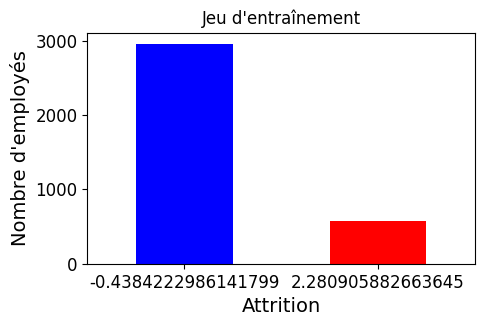

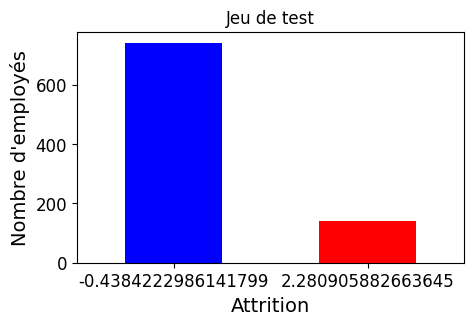

In [7]:
# Nombre de données dans chaque ensemble
print(f"Nombre de données dans l'ensemble d'entraînement : {len(X_train)}")
print(f"Nombre de données dans l'ensemble de test : {len(X_test)}")

# Diagramme pour le jeu d'entraînement
plt.figure(figsize=(5, 3))
y_train.value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Jeu d\'entraînement')
plt.xlabel('Attrition')
plt.ylabel('Nombre d\'employés')
plt.xticks(rotation=0)
plt.show()

# Diagramme pour le jeu de test
plt.figure(figsize=(5, 3))
y_test.value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Jeu de test')
plt.xlabel('Attrition')
plt.ylabel('Nombre d\'employés')
plt.xticks(rotation=0)
plt.show()


On peut observer que nos ensembles d'entraînement et de test sont correctement répartis, présentant une proportion équivalente pour l'attribut "Yes" (2.28) et "No" (-0.43). Avec un total de 3528 données dans l'ensemble d'entraînement et 882 données dans l'ensemble de test.

### Mélange de données

Nous avons effectué un mélange aléatoire des données de l'ensemble d'entraînement (`X_train` et `y_train`) en utilisant la permutation aléatoire (`np.random.permutation`). Cette étape est cruciale pour éviter les biais potentiels liés à l'ordre des données, améliorer la généralisation du modèle, et optimiser la convergence de l'apprentissage.


In [8]:
# Sauvegarder les indices avant le mélange
indices_avant_melange = np.arange(len(X_train))

# Mélanger les indices
shuffle_index = np.random.permutation(len(X_train))
X_train, y_train = X_train.iloc[shuffle_index], y_train.iloc[shuffle_index]

# Sauvegarder les indices après le mélange
indices_apres_melange = shuffle_index

# Afficher les indices avant et après le mélange
print("Indices avant le mélange :", indices_avant_melange)
print("Indices après le mélange :", indices_apres_melange)

# Garder les données avec attrition à True (> 0)
y_train_yes = (y_train > 0)
y_test_yes = (y_test > 0)

Indices avant le mélange : [   0    1    2 ... 3525 3526 3527]
Indices après le mélange : [2279 1429 3293 ... 2801 3491 1812]


## Choisir et Entraîner un modèle

Avant de plonger dans les détails, il est essentiel de comprendre comment on a choisi, entraîné, et évalué notre modèle. Une étape cruciale a consisté à analyser les performances de plusieurs modèles sur un ensemble de test.

On a opté pour la classe de modèle dédiée à la classification plutôt que des modèles de régression. Cette décision découle de notre objectif : évaluer les caractéristiques qui influent sur le départ ou le maintien d'une personne dans l'entreprise. Étant donné la nature binaire de ce problème (départ ou non), on a jugé qu'**un modèle de classification** serait plus adapté. 

### Fonction d'Entraînement et d'Évaluation des Modèles

Nous avons décidé de créer une fonction `display_scores` qui permet d'entraîner, évaluer et afficher les scores de différents modèles de manière cohérente. Cette fonction, définie dans le code ci-dessous, a plusieurs objectifs cruciaux dans notre projet :


#### Graphiques Informatifs 

- La fonction génère des graphiques informatifs, tels que la courbe précision vs rappel et la courbe précision vs rappel en fonction du seuil.
- Ces graphiques facilitent la visualisation des performances du modèle et aident à choisir un seuil adapté en fonction des besoins spécifiques de notre projet.

In [9]:
# Affiche le graphique de la précision et recall en fonction du seuil
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(6, 4))
    plt.plot(thresholds, precisions[:-1], "b-", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.show()

# Affiche le graphique de la précision en fonction du recall
def plot_precision_vs_recall(precisions, recalls):
    plt.figure(figsize=(6, 4))
    plt.plot(recalls, precisions, "k-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.show()

# Affiche la matrice de confusion
def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(3, 3))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Prediction Vrai", "Prediction Faux"],
                yticklabels=["Actual Vrai", "Actual Faux"])
    plt.xlabel("Prediction")
    plt.ylabel("Réalité")
    plt.title("Matrice de Confusion")
    plt.show()

#### Entraînement et Évaluation

- La fonction utilise la méthode spécifiée (decision_function ou predict_proba) pour obtenir les scores des modèles.
- Elle entraîne le modèle sur les données fournies, évaluant ainsi ses performances à l'aide de différentes métriques telles que la matrice de confusion, la précision, le recall, le F1-score, et l'accuracy.
- La validation croisée avec 3 plis (cv=3) est intégrée dans le processus, assurant une évaluation robuste et évitant les biais liés à une seule division des données.

In [10]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, precision_recall_curve, roc_curve
from sklearn.model_selection import cross_val_predict

# Entraîner et évaluer le modèle puis afficher les scores
def display_scores(model, x, y, method):
    model.fit(x, y) # Entraîner le modèle

    y_train_pred = cross_val_predict(model, x, y, cv=3) # Validation croisée
    y_scores = cross_val_predict(model, x, y, cv=5, method=method) # Calcul des scores

    # Calcul des différents indicateurs de performance
    conf_matrix = confusion_matrix(y, y_train_pred)
    precision = precision_score(y, y_train_pred)
    recall = recall_score(y, y_train_pred)
    f1 = f1_score(y, y_train_pred)
    accuracy = accuracy_score(y, y_train_pred)


    # Si method est "decision_function", y_scores est un tableau 1D
    if method == "decision_function":
        # calculer précisions, recalls et seuils pour la courbe ROC
        precisions, recalls, thresholds = precision_recall_curve(y, y_scores)
        a, b, c = roc_curve(y, y_scores)
    # Si method est "predict_proba", y_scores est un tableau 2D
    else:
        # calculer précisions, recalls et seuils pour la courbe ROC
        precisions, recalls, thresholds = precision_recall_curve(y, y_scores[:, -1])
        a, b, c = roc_curve(y, y_scores[:, -1])

    

    # Affichage des indicateurs de performance
    print('Précision : ', precision)
    print('Recall : ', recall)
    print('F1-score : ', f1)
    print('Accuracy : ', accuracy)

    # Affichage des graphiques
    plot_confusion_matrix(conf_matrix)
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
    plot_precision_vs_recall(precisions, recalls)


    # retourner précisions, recalls et seuils pour la courbe ROC
    return a, b, c
    


### Modèle :  SDG Classifier

On a choisi de tester le SDG Classifier en raison de sa capacité à converger rapidement sur des ensembles de données volumineux, ce qui s'aligne parfaitement avec notre objectif de prédire le départ ou le maintien d'une personne dans l'entreprise. Sa flexibilité quant à la fonction de perte en fait un choix pertinent pour notre projet dynamique.

Précision :  0.38247011952191234
Recall :  0.3368421052631579
F1-score :  0.3582089552238806
Accuracy :  0.8049886621315193


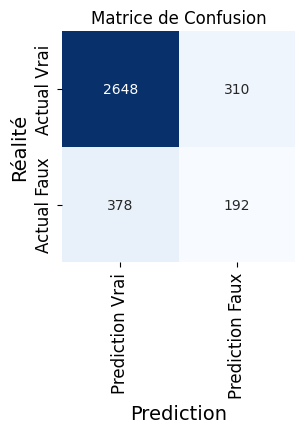

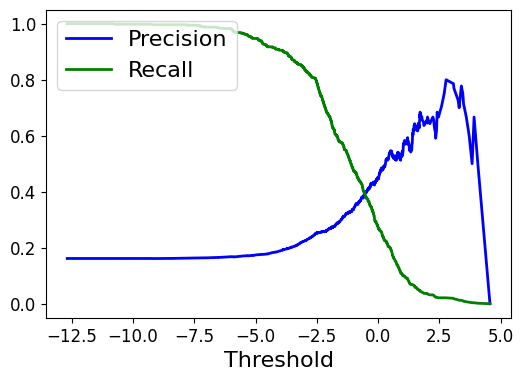

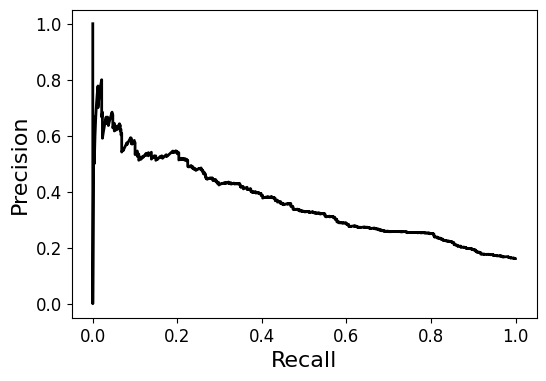

In [11]:
from sklearn.linear_model import SGDClassifier

# Créer un SGDClassifier
sgd_clf = SGDClassifier(max_iter=1000, random_state=42)

# Entraîner et évaluer le modèle
fpr_sdg, tpr_sdg, thresholds_sdg = display_scores(sgd_clf, X_train, y_train_yes, "decision_function")

### Modèle : RandomForestClassifier

On a opté pour le RandomForestClassifier pour sa capacité à traiter des ensembles de données complexes grâce à l'agrégation d'arbres de décision. Cette approche permet de saisir des relations non linéaires et des interactions complexes entre les caractéristiques, fournissant ainsi une représentation plus complète du problème.

Précision :  0.9713656387665198
Recall :  0.7736842105263158
F1-score :  0.861328125
Accuracy :  0.9597505668934241


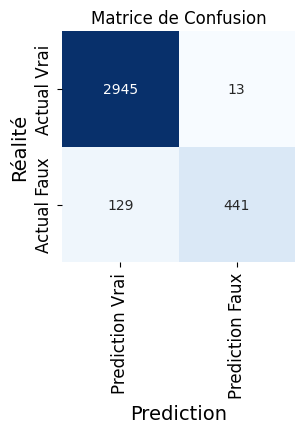

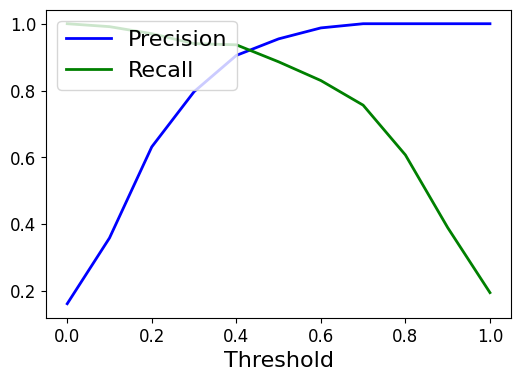

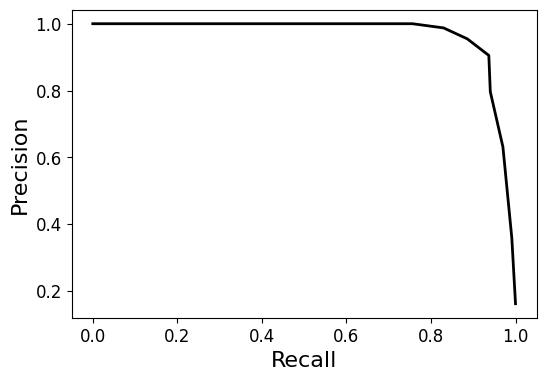

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Créer un RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42, n_estimators=10)

# Entraîner et évaluer le modèle
fpr_clf, tpr_clf, thresholds_clf = display_scores(forest_clf, X_train, y_train_yes, "predict_proba")

### Modèle : Régression logistique

La régression logistique a été choisie en raison de sa simplicité et de son interprétabilité. Souvent utilisée comme point de référence, elle offre une comparaison avec des modèles plus complexes, nous permettant de déterminer si sa simplicité est suffisante pour notre problème de prédiction du départ d'un employé.

Précision :  0.5989304812834224
Recall :  0.19649122807017544
F1-score :  0.29590488771466317
Accuracy :  0.8489229024943311


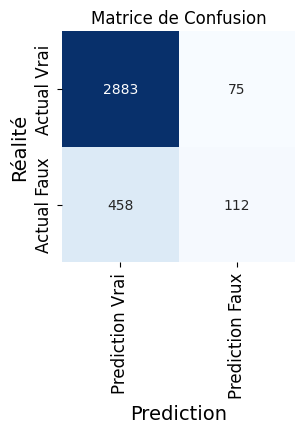

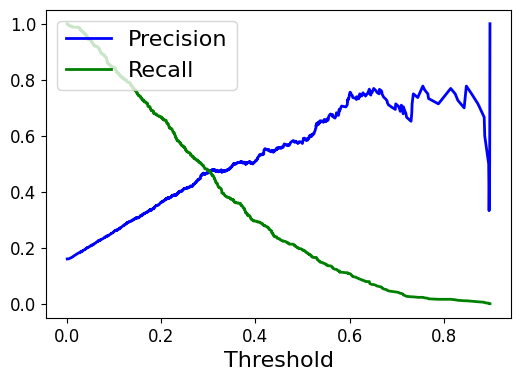

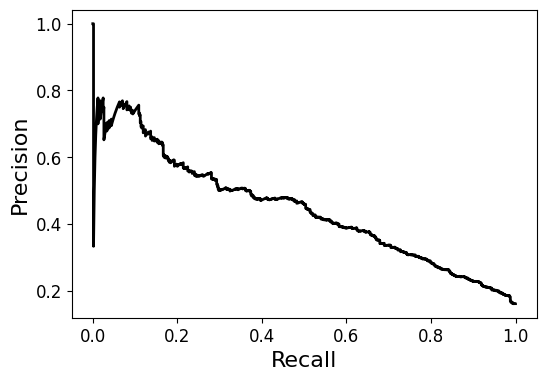

In [13]:
from sklearn.linear_model import LogisticRegression

# Créer une LogistiqueRegression
logisticRegr = LogisticRegression()

# Entraîner et évaluer le modèle
fpr_lgr, tpr_lgr, thresholds_lgr = display_scores(logisticRegr, X_train, y_train_yes, "predict_proba")

### Modèle : VotingClassifier

On a décidé d'intégrer le VotingClassifier pour exploiter les avantages de plusieurs modèles. En agrégeant les prédictions, ce modèle améliore la performance globale et réduit le risque de surajustement. Cette approche profite de la diversité des modèles individuels, offrant ainsi une robustesse accrue et une meilleure capacité de généralisation aux nouvelles données.

Précision :  0.977491961414791
Recall :  0.5333333333333333
F1-score :  0.6901248581157775
Accuracy :  0.9226190476190477


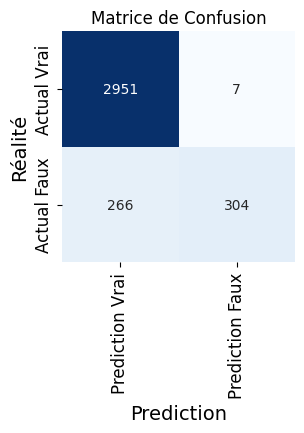

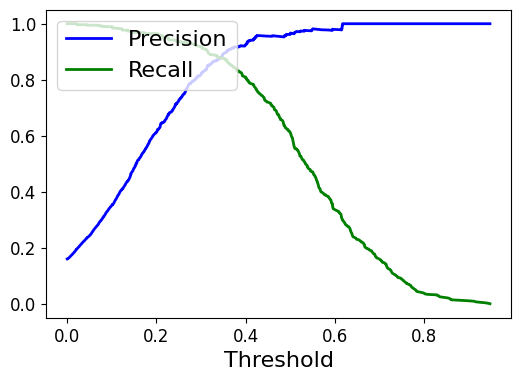

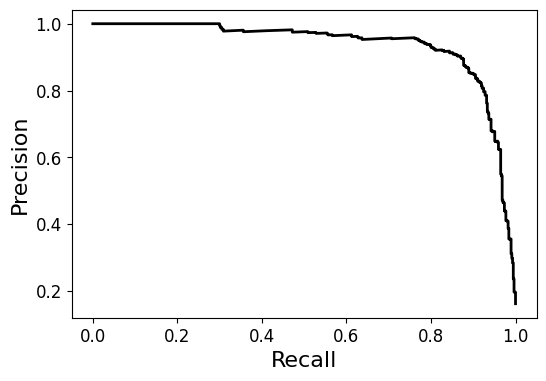

In [14]:
from sklearn.ensemble import  VotingClassifier

# Créer un RandomForestClassifier et un LogisticRegression
voting_forest = RandomForestClassifier(random_state=42, n_estimators=10)
voting_logisticRegr = LogisticRegression()

# Créer un VotingClassifier en mixant le RandomForestClassifier et la LogisticRegression
voting_clf = VotingClassifier(estimators=[('lr', voting_logisticRegr), ('rf', voting_forest)], voting='soft')

# Entraîner et évaluer le modèle
fpr_voting, tpr_voting, thresholds_voting = display_scores(voting_clf, X_train, y_train_yes, "predict_proba")

### Comparaison des différents modèles
Dans cette section, nous avons sélectionné un modèle en se basant sur la performance globale des candidats.

#### Courbe ROC
La courbe ROC a été un outil essentiel dans notre processus de sélection du modèle. En analysant la capacité de chaque modèle à discriminer entre les classes, nous avons pu évaluer leur efficacité en termes de taux de faux positifs et de vrais positifs. Cette visualisation a joué un rôle clé dans la prise de décision finale en identifiant le modèle offrant le meilleur équilibre entre sensibilité et spécificité.

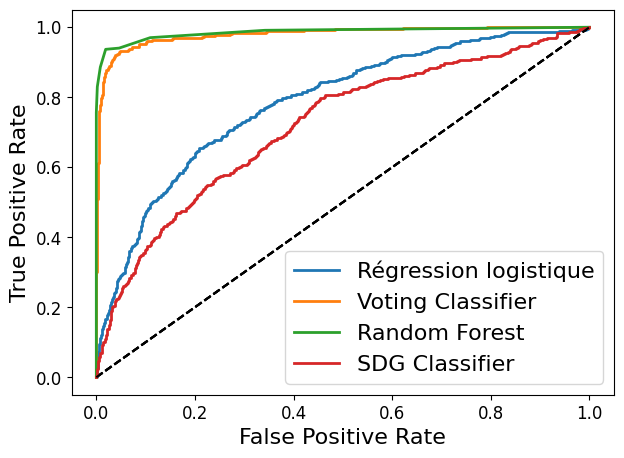

In [15]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

# Afficher le graphique
plt.figure(figsize=(7, 5))
plot_roc_curve(fpr_lgr, tpr_lgr, "Régression logistique")
plot_roc_curve(fpr_voting, tpr_voting, "Voting Classifier")
plot_roc_curve(fpr_clf, tpr_clf, "Random Forest")
plot_roc_curve(fpr_sdg, tpr_sdg, "SDG Classifier")
plt.legend(loc="lower right", fontsize=16)
plt.show()

Ainsi, au vu des différents résultats entre les différents modèles, nous pouvons les classer comme suit en termes de performance :

| Position | Modèle               |
|----------|----------------------|
| 1er      | RandomForest        |
| 2ème     | VotingClassifier     |
| 3ème     | Régression logistique|
| 4ème     | SDG Classifier       |

Nous allons donc, par la suite de ce notebook, améliorer notre meilleur modèle, le **RandomForest**.

## Amélioration du modèle 

### GridSearchCV

Utilisation de la méthode GridSearchCV afin de trouver les meilleurs hyperparamètres pour notre modèle de RandomForest.

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Définir les paramètres
param_grid = {
    'n_estimators': [50],
    'max_depth': [None, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'bootstrap': [True, False]
}

# Créer un GridSearchCV
grid_search = GridSearchCV(forest_clf, param_grid, cv=StratifiedKFold(n_splits=3), scoring='accuracy', verbose=1, n_jobs=-1)

# Effectuer la recherche par grille sur les données d'entraînement
grid_search.fit(X_train, y_train_yes)

# Afficher les meilleurs paramètres et la performance associée
print("Meilleurs paramètres : ", grid_search.best_params_)
print("Meilleur score de validation croisée : ", grid_search.best_score_)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Meilleurs paramètres :  {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Meilleur score de validation croisée :  0.9713718820861678


### Corélation

Text(0.5, 0, 'Relative Importance')

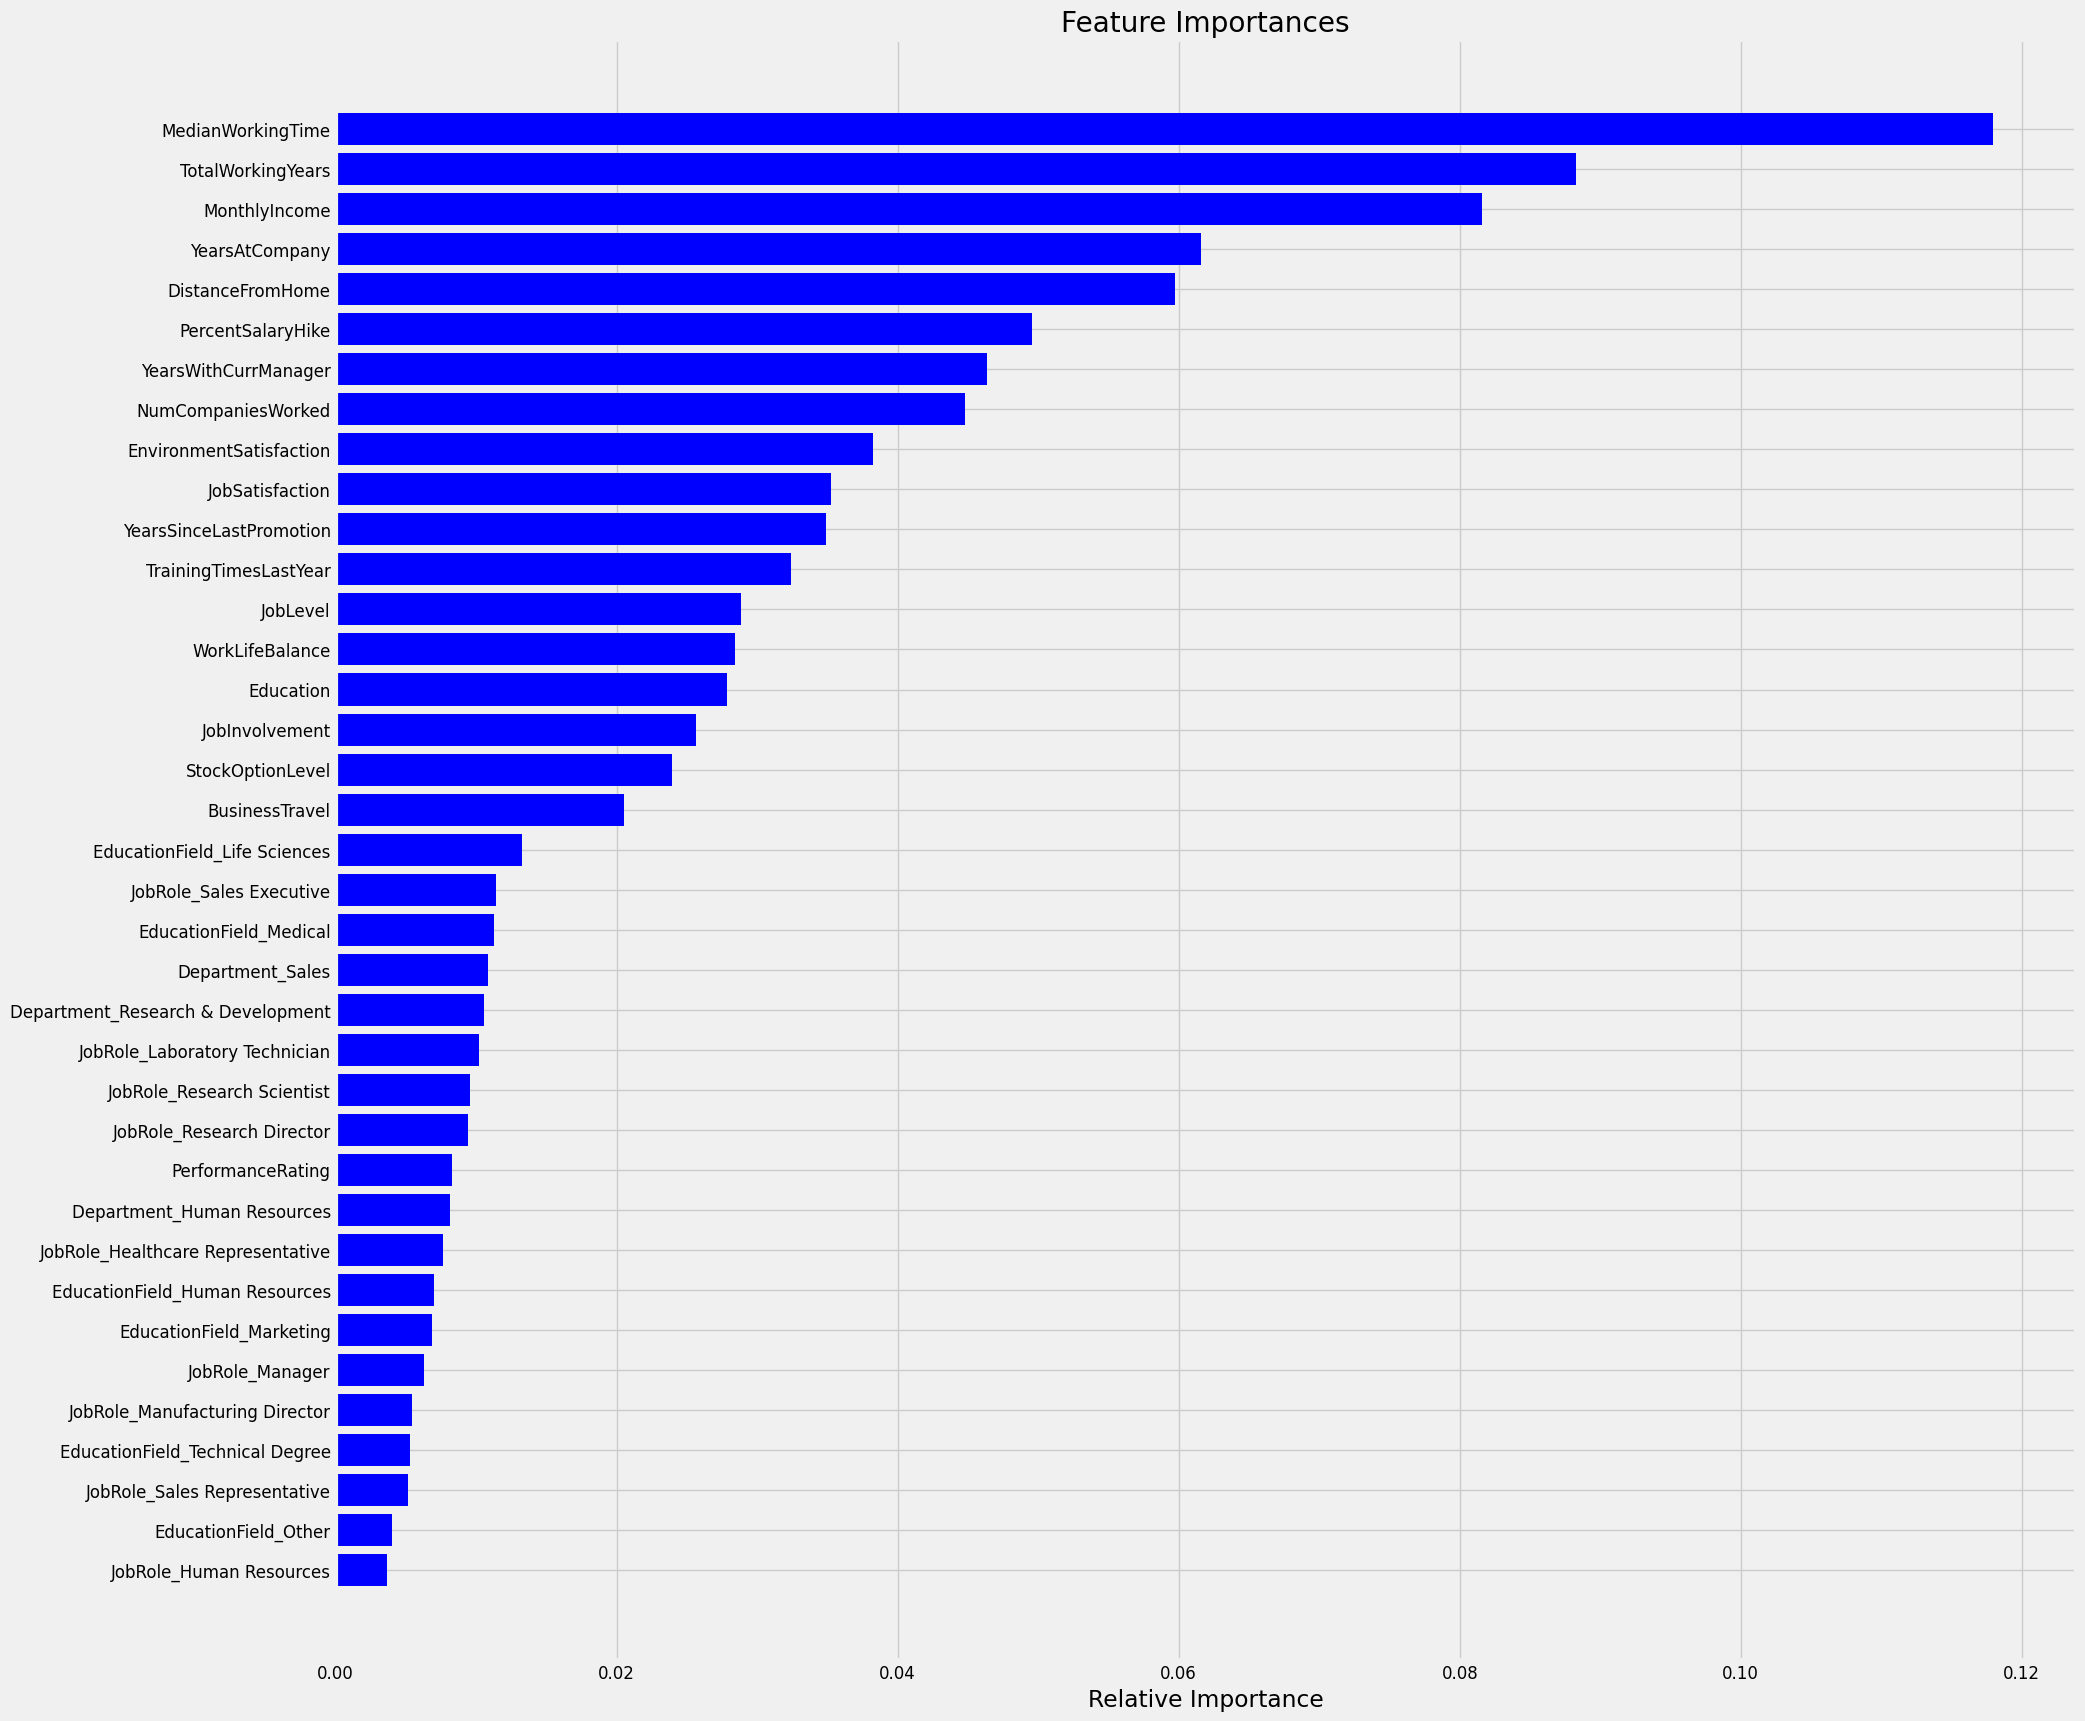

In [17]:
# Récupérer l'importance de chaque paramètre pour notre modèle
feature_importances = grid_search.best_estimator_.feature_importances_

# Créer une liste de tuples avec l'importance de chaque paramètre et son nom
importance_tuples = sorted(zip(feature_importances, X.columns), reverse=True)

indices = np.argsort(feature_importances)

# Afficher le graphique
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.figure(figsize=(20,20))

plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')


## Vérification du modèle sur le jeu de Test

Précision :  1.0
Recall :  0.9574468085106383
F1-score :  0.9782608695652174
Accuracy :  0.9931972789115646


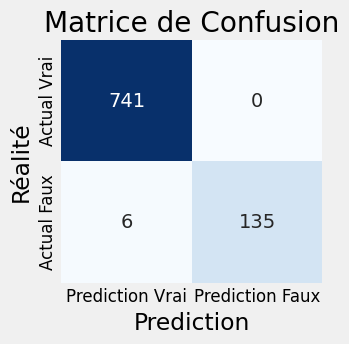

In [25]:
# Prédire les données de test
y_test_pred = grid_search.best_estimator_.predict(X_test)

def show_score(pred):
    # Calcule des différents indicateurs de performance
    conf_matrix = confusion_matrix(y_test_yes, pred)
    precision = precision_score(y_test_yes, pred)
    recall = recall_score(y_test_yes, pred)
    f1 = f1_score(y_test_yes, pred)
    accuracy = accuracy_score(y_test_yes, pred)
    

    # Affichage des indicateurs de performance
    print('Précision : ', precision)
    print('Recall : ', recall)
    print('F1-score : ', f1)
    print('Accuracy : ', accuracy)


    plot_confusion_matrix(conf_matrix)

show_score(y_test_pred)

Précision :  1.0
Recall :  0.9574468085106383
F1-score :  0.9782608695652174
Accuracy :  0.9931972789115646


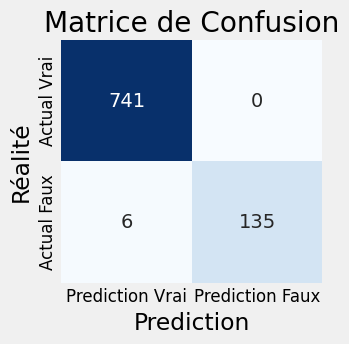

In [28]:
import joblib


joblib.dump(grid_search,"HumanForYou_RandomForestCollection_Kernel.pkl")
my_loaded_model = joblib.load("HumanForYou_RandomForestCollection_Kernel.pkl")


prediction = my_loaded_model.predict(X_test)
show_score(prediction)